[Latent Semantic Analysis (LSA)](#Latent-Semantic-Analysis-(LSA))

1. [What is Semantic Analysis?](#What-is-Semantic-Analysis?)
2. [Latent Semantic Analysis (LSA)](#Latent-Semantic-Analysis-(LSA))
3. [Comparing Terms Using the Left Singular Vectors in $T$](#Comparing-Terms-Using-the-Left-Singular-Vectors-in-$T$)   
4. [Comparing Documents Using the Right Singular Vectors in $D$](#Comparing-Documents-Using-the-Right-Singular-Vectors-in-$D$)   
5. [Examining the Singular Values,  $S$](#Examining-the-Singular-Values,-$S$).   
)    
6. [How to Use LSA](#How-to-Use-LSA)
7. [LSA for Queries](LSA-for-Queries)



# Latent Semantic Analysis (LSA)



## What is Semantic Analysis?
So far we've cleaned text data, learned how to format it into more useable forms and subsequently used those forms to calculate how similar two documents within a given corpus were.

That's quite a bit for our semester!

In this section of the program we move onto how we can use machines to quickly approximate the meaning of texts within a given corpus. In NLP this is known as semantic analysis. Merriam Webster defines semantics as the study of meanings. So in NLP we can think of this branch as us trying to figure out what a document is about, what are the document's "topics".

We'll specifically look at latent semantic analysis (LSA) and it times permit.

## Latent Semantic Analysis (LSA)

Now that we've spent some time in linear algebra land let's return to NLP with latent semantic analysis. The idea behind this algorithm is to use SVD to uncover the semantics that are "latent" in the text. We'll be working from this 1990 paper published in the Journal of the American Society for Information Science by Deerwester et. al http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.62.1152&rep=rep1&type=pdf

For this notebook we'll be working with this collection of sentences that were made up, hopefully they work!

Let's go!


In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [4]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
sentences = ["Columbus happens to be the state capital of Ohio.",
            "My girlfriend studies graphic design at Columbus State.",
            "The Ohio State Buckeyes play football in Columbus, Ohio.",
            "Columbus is a city built on bold ideas and fueled by relentless optimism.",
            "Columbus is open and welcoming visitors and is dedicated to doing so safely.",
            "Cats have tiny whiskers",
            "My cat is named Brutus.",
            "I have two cats, one is quite fluffy",
            "The best coffee shop in Columbus is right by my house.",
            "My one cat has brown fur, my other cat has no fur!",
            "Kitty is another word for cat.",
            "Have you seen how beautiful the sunrise can be in Columbus?",
            "That stray cat is in the garbage can again.",
            "Here kitty, kitty, kitty. Why do you play with me?",
            "Hamsters, dogs, cats, and boas. All make great pets.",
            "I cannot believe the city of Columbus makes you pay for parking.",
            "I have two cats, and they are named Perry and Brie.",
            "Cat adoptions have increased since the pandemic started.",
            "Columbus has the best ice cream shops.",
            "My mom has four dogs and four cats.",
            "Columbus is a hockey town now.",
            "My cat Bailey loves to eat cucumbers and frozen pumpkin.",
            "I buy my cats lots of nice toys, but their favorite thing to play with are the twist ties from bread bags.",
            "The roads are going to be bad in the Columbus neighborhood of German Village.",
            "Columbus is one of four cities in Ohio.",
            "My two cats like to fight a lot.",
            "One of the best things about visiting Columbus is the chance to explore its fascinating and fun-filled neighborhoods.",
            "Columbus is a great city for cat owners!",
            "During the next season of Top Chef, Columbus native Avishar Barua will be a competitor.",
            "I saw a woman walking her cat down the street!"]

basis_set = ["columbus", "state", "ohio", "city",
             "play", "cats", "cat", "kitty", "fur"]

Now if you go through these 30 sentences you may sense a few of topics. LSA will work to detect these.

Let's first start by taking these silly sentences, cleaning them up, and making a very specific document-term matrix.

In [6]:
doc_term = np.zeros((len(sentences),len(basis_set)))

word_dict = {}

for i in range(len(sentences)):
    word_dict[i] = {}
    for word in [word.lower() for word in tokenizer.tokenize(sentences[i])]:
        if word in basis_set:
            if word in word_dict[i].keys():
                word_dict[i][word] = word_dict[i][word] + 1
            else:
                word_dict[i][word] = 1

In [7]:
word_dict

{0: {'columbus': 1, 'state': 1, 'ohio': 1},
 1: {'columbus': 1, 'state': 1},
 2: {'ohio': 2, 'state': 1, 'play': 1, 'columbus': 1},
 3: {'columbus': 1, 'city': 1},
 4: {'columbus': 1},
 5: {'cats': 1},
 6: {'cat': 1},
 7: {'cats': 1},
 8: {'columbus': 1},
 9: {'cat': 2, 'fur': 2},
 10: {'kitty': 1, 'cat': 1},
 11: {'columbus': 1},
 12: {'cat': 1},
 13: {'kitty': 3, 'play': 1},
 14: {'cats': 1},
 15: {'city': 1, 'columbus': 1},
 16: {'cats': 1},
 17: {'cat': 1},
 18: {'columbus': 1},
 19: {'cats': 1},
 20: {'columbus': 1},
 21: {'cat': 1},
 22: {'cats': 1, 'play': 1},
 23: {'columbus': 1},
 24: {'columbus': 1, 'ohio': 1},
 25: {'cats': 1},
 26: {'columbus': 1},
 27: {'columbus': 1, 'city': 1, 'cat': 1},
 28: {'columbus': 1},
 29: {'cat': 1}}

In [8]:
for i in word_dict.keys():
    for j in range(len(basis_set)):
        if basis_set[j] in word_dict[i].keys():
            doc_term[i,j] = word_dict[i][basis_set[j]]

In [10]:
pd.DataFrame(doc_term,
             columns = basis_set,
             index = ['doc_' + str(i) for i in range(len(sentences))]).sort_values(['columbus',
                                                                                    'state',
                                                                                    'ohio',
                                                                                    'city',
                                                                                    'play',
                                                                                    'cats',
                                                                                    'cat',
                                                                                    'kitty',
                                                                                    'fur'], ascending=False)

,columbus,state,ohio,city,play,cats,cat,kitty,fur
doc_2,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
doc_0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_24,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_27,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
doc_3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
doc_15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
doc_4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So what we've generated above is a word count vector using a small basis set of the most frequently used word. (Note this is only so we can clearly convey what is going on with LSA using 2-dimensions, which is usually not possible with real corpuses).

__Now we need the transpose of the document-term frequency matrix, this is known as the term-document matrix__.

In [12]:
term_doc = doc_term.transpose()

In [13]:

pd.DataFrame(term_doc,
             index = basis_set,
             columns = ['doc_' + str(i) for i in range(len(sentences))])

,doc_0,doc_1,doc_2,doc_3,doc_4,doc_5,doc_6,doc_7,doc_8,doc_9,...,doc_20,doc_21,doc_22,doc_23,doc_24,doc_25,doc_26,doc_27,doc_28,doc_29
columbus,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
state,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ohio,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
city,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
play,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cats,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
cat,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
kitty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


LSA is essentially the utilization of the SVD of the term-document matrix.

### You Code
First find the SVD of `term_doc` below and then we'll go through how we can use it. In reasons that will become obvious soon call the $*$ matrix `T`, call the $\sum$ matrix `S`, and call the $V^T$ matrix `Dt`

In [14]:
# Recall that np.linalg.svd returns U S and V^T
T,S,Dt = np.linalg.svd(term_doc)

For LSA to work we replace the term-document matrix with the approximation of the matrix that corresponds taking the first  singular directions, where  is the rank of the term-document matrix. Run the below code to make this dimensionality adjustment.

In [16]:
## np.linalg.matrix_rank gives the rank of the matrix
rank = np.linalg.matrix_rank(term_doc)

# We'll now replace all of our SVD output with
# our lower rank approximation version.
T = T[:,:rank]
Dt = Dt[:rank,:]
D = Dt.transpose()
Sigma = np.zeros((rank,rank))

for i in range(len(S)):
    Sigma[i,i] = S[i]

In [18]:
print("The term-document matrix is a",np.shape(term_doc),"matrix")
print("====================================")
print("T is a",np.shape(T),"matrix")
print("Sigma is a",np.shape(Sigma),"matrix")
print("D transpose is a",np.shape(Dt),"matrix")

The term-document matrix is a (9, 30) matrix
T is a (9, 9) matrix
Sigma is a (9, 9) matrix
D transpose is a (9, 30) matrix


## Comparing Terms Using the Left Singular Vectors in $T$
Let $A$ denote our term-document matrix. Then each row of $A$ represents a measure of how often one of our terms appears in a given document. Taking the dot product of two separate rows of $A$ reflects how often two terms tend to occur together across our documents. We can do this simultaneously for all pairs of documents by computing:

$$
AA^T = T \Sigma^{2}T^T,
$$

and thus the $i,j$  cell of $AA^T$  is found by taking the dot product of the $i$  and $j$  rows of $T\Sigma$.

In particular, we can think of the columns of $T\Sigma$ as provide coordinates for our terms, i.e. providing vectors for the terms that more accurately reflect which terms occur together.

Compute `TS` below and plot the first two columns.

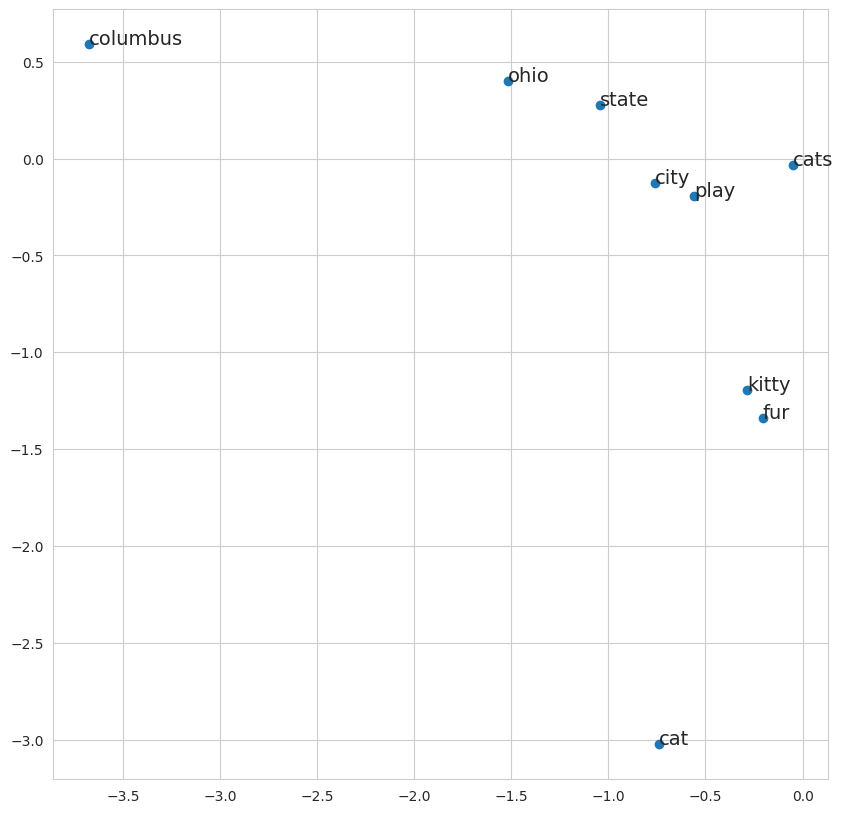

In [29]:
## Code here
TS = np.matmul(T, Sigma)

# Hint use plt.scatter
# Begin Plot
plt.figure(figsize=(10,10))
plt.scatter(TS[:, 0], TS[:, 1])

# Leave this code in to see what terms are represented by what points
for i in range(len(basis_set)):
    plt.text(T.dot(Sigma)[i,0], T.dot(Sigma)[i,1], basis_set[i], fontsize=14)


Could you come up with a "topic" or "meaning" that is captured by the first singular direction? What about the second?

This plot worked well for us here because we had a toy example, another approach to investigating $T\Sigma$ is to make a dataframe where each column is a column of $T\Sigma$ and your index are the terms represented in each row.

Do that below, then sort according to the first and second singular directions

In [30]:
## Code here
term_space = pd.DataFrame(TS)

In [34]:
# Verify we did it correctly
print(TS[:, 0])
term_space.head()

[-3.67645542 -1.04314913 -1.51901628 -0.76044594 -0.55967088 -0.0487594
 -0.74097905 -0.28543648 -0.20471559]


,0,1,2,3,4,5,6,7,8
0,-3.676455,0.589967,0.306977,-0.234224,-0.893430,-0.341353,0.223767,0.143970,-0.031294
1,-1.043149,0.276623,-0.153144,0.161305,0.936881,0.007441,0.184203,-0.872664,-0.335519
2,-1.519016,0.398844,-0.320454,0.320450,1.707020,0.298992,-0.165153,0.230093,0.494574
3,-0.760446,-0.125214,0.236223,-0.145914,-0.798728,0.844285,-0.946712,-0.276962,0.072085
4,-0.559671,-0.195599,-1.170678,0.412561,0.500972,0.122057,-0.383166,0.466477,-0.691033


In [35]:
term_space_sorted = term_space.sort_values(by=[0, 1])

In [36]:
term_space_sorted.head()

,0,1,2,3,4,5,6,7,8
0,-3.676455,0.589967,0.306977,-0.234224,-0.893430,-0.341353,0.223767,0.143970,-0.031294
2,-1.519016,0.398844,-0.320454,0.320450,1.707020,0.298992,-0.165153,0.230093,0.494574
1,-1.043149,0.276623,-0.153144,0.161305,0.936881,0.007441,0.184203,-0.872664,-0.335519
3,-0.760446,-0.125214,0.236223,-0.145914,-0.798728,0.844285,-0.946712,-0.276962,0.072085
6,-0.740979,-3.024126,0.947191,0.095482,0.172340,0.453655,0.394247,0.072292,-0.056254


## Comparing Documents Using the Right Singular Vectors in $D$
This process will be similar.

Again consider our term-document matrix $A$. columns of $A$ represent the profile of terms from our basis set used in each document. In this setting the dot product between two distinct columns of $A$ will tell us how similar two documents are with regard to their term usage. To compute the dot product between all unique documents all at once we find:

$$
AA^T = D \Sigma^{2}D^T,
$$

and once again we note that the $i,j$ entry of $AA^T$ is precisely the dot product between the $i$ and $j$ rows of $D \Sigma$.

Just in the same way as we examined the "term space" above we can examine the "document space", however, we are now more equipped explorers because we have our knowledge from when we explored the term space, i.e. we know that the first singular direction (first column of $D \Sigma$) measures "Columbusness" and the second singular direction (second column of $D \Sigma$) measures the "Catness" of each document.

Compute `DS` below and plot the first two columns.

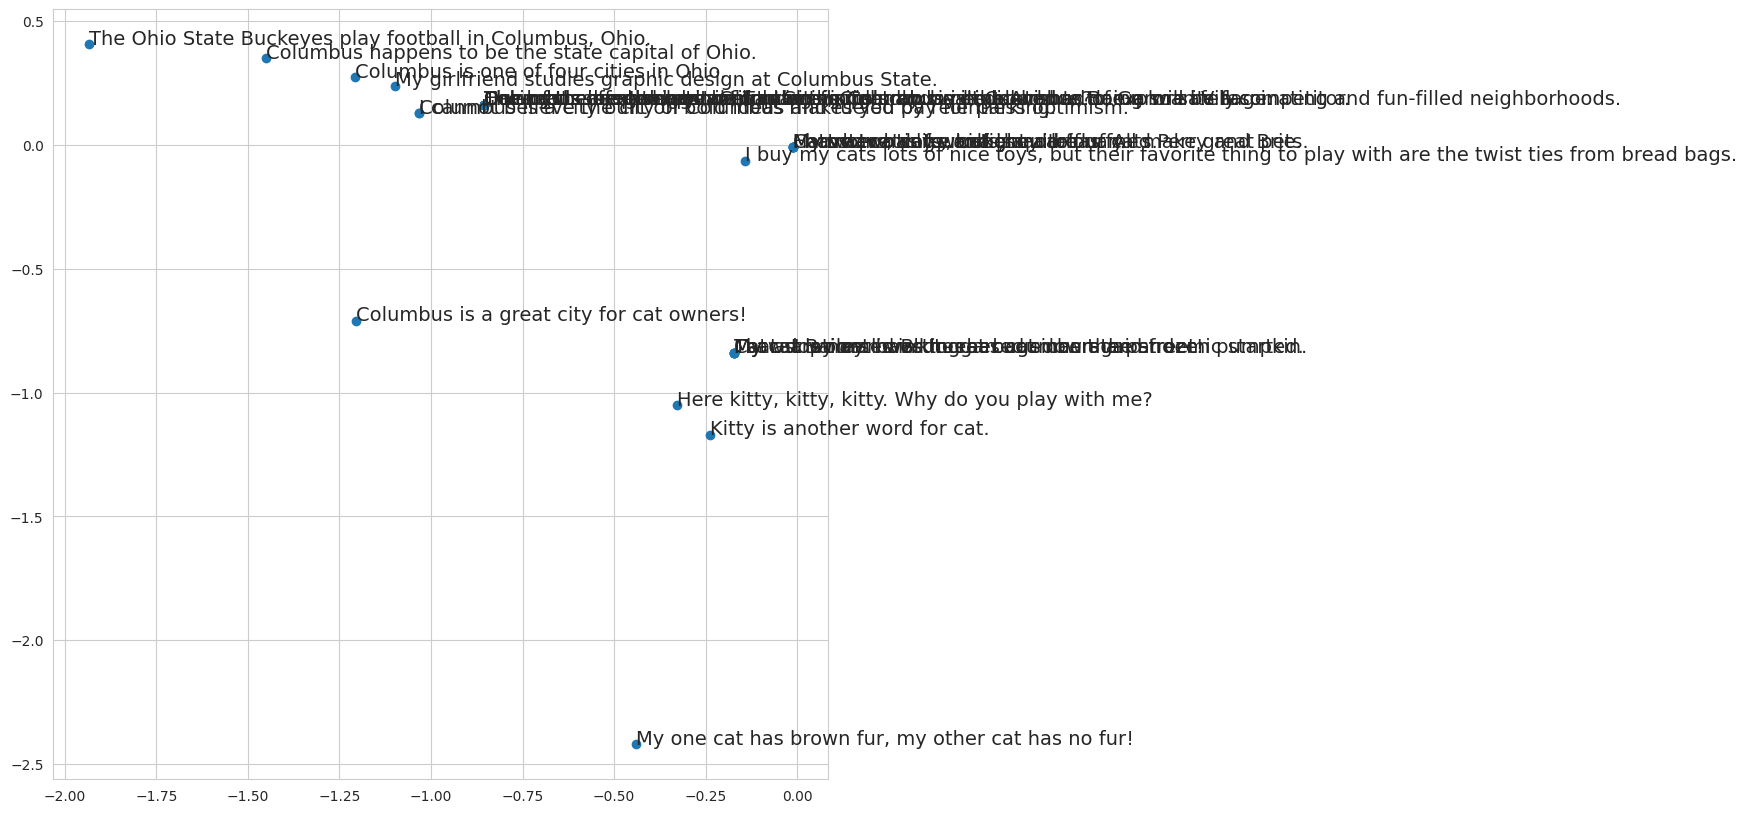

In [37]:
## Code here
DS = np.matmul(D, Sigma)

# Hint use plt.scatter
# Begin Figure
plt.figure(figsize=(10,10))
plt.scatter(DS[:, 0], DS[:, 1])


# Leave this code in to see what sentences are represented by what points
for i in range(len(sentences)):
    plt.text(D.dot(Sigma)[i,0], D.dot(Sigma)[i,1], sentences[i], fontsize=14)




## Examining the Singular Values,  $S$

So we've looked at the "term-space" the "document-space", but we have yet to look at the singular values themselves. We'll use these much like you would use the explained variance ratio from PCA. Recall the Eckart-Young theorem:

$$
\min_{rank(B)=k} ||A-B||_2 = ||A -A_k||_2 = \sigma_{k+1}
$$


where $A_k$ is the rank $k$  approximation of the original matrix $A$.

So we can use singular values $2$ through $9$ to calculate the reconstruction accuracy (take one minus the error and divide by the number of entries in $A$). This can help us determine how many singular directions we should look at when reducing the dimensionality of the data.

In [38]:
accs = []

for i in range(1,len(S)):
    accs.append(1-S[i]/np.product(np.shape(term_doc)))

In [39]:
accs

[0.986637565567657,
 0.9877675185701824,
 0.990088664769744,
 0.9908226348554908,
 0.9943533465785126,
 0.9949292054497194,
 0.9959775634528323,
 0.9964528659594966]

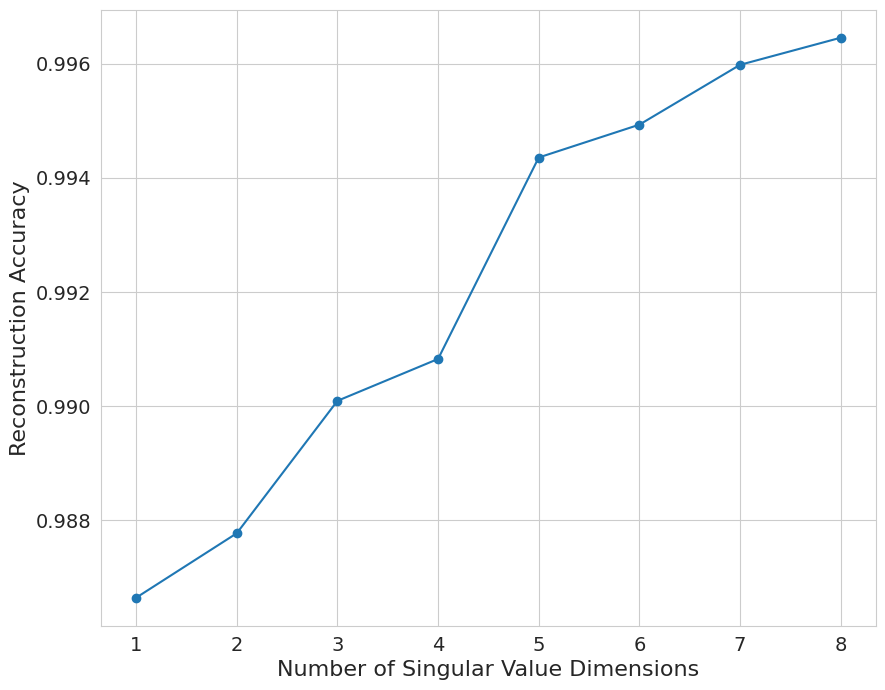

In [42]:
plt.figure(figsize=(10,8))

plt.plot(range(1,len(accs)+1),accs,'-o')

plt.xlabel("Number of Singular Value Dimensions", fontsize=16)
plt.ylabel("Reconstruction Accuracy", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## How to Use LSA
LSA can be used in a number of different settings including both supervised (think classification) and unsupervised (think clustering) learning.

For an example of LSA in classification let's harken back to our time tested example SMS spam classification. You could project documents into a lower dimensional "document space" and then use this lower dimensional data set as the input for the classification algorithm of your choice.

To use LSA in clustering, you could again project either the terms or documents into the lower dimensional spaces (depending on your desired use case) and then cluster them with another clustering algorithm. As an example, maybe you're interested in the differences in language between sci-fi novels and historical fictions, or maybe the lyrical differences between two genres of music.

To finish this notebook we'll look at the original intent of LSA, document retrieval. This task is why this technique was originally known as latent semantic indexing.

## LSA for Queries
Suppose somebody wants to find all documents in our corpus that are associated with "kitty play". One way to do this would be to just search for an exact match to "kitty play", however, maybe there are documents that say something like "My cat likes to play outside". This should still be associated with the phrase "kitty play", but not "Buckeyes play" right?

This one way we can leverage LSA. LSA groups words that occur together, and we can remember in our corpus that "kitty" and "cat" are associated.

### Step 1. Make a Term-Document Row for the Pseudo-Document
Look back at our term-document matrix above and make the row that would result if we had included "kitty play" in our original corpus. Call it `q`.

In [45]:
# basis set was:
# columbus 	state 	ohio 	city 	play 	cats 	cat 	kitty 	fur
q = [0., 0., 0., 0., 1., 0., 0., 1., 0.]

In [44]:
term_doc[0]

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.])

### Step 2. Make
We need to derive a representation for our query, `q` in the document space. We'll call this $D_q$. It can be shown that the appropriate formula for $D_q$ is:

$$
D_q = qT\Sigma^{-1}
$$

Using the fact that `np.linalg.inv` computes the inverse of a matrix find `Dq`.

In [49]:
Dq = np.matmul(q, T, np.linalg.inv(Sigma))
Dq.shape

(9, 9)

Now plot  $D_q$  as a large red dot in the 2 dimensional document space.

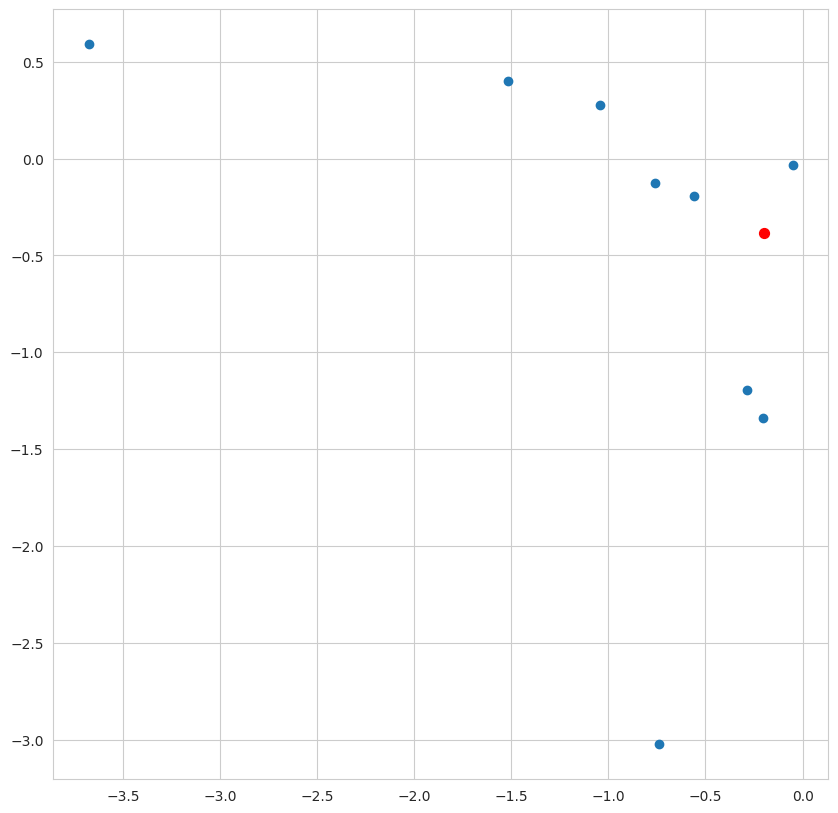

In [54]:
# Hint you can control the color of a dot in plt.scatter with c =
# you can control the size of a dot in plt.scatter with s =
plt.figure(figsize=(10,10))
plt.scatter(TS[:, 0], TS[:, 1])
plt.scatter(Dq[0, 0], Dq[0, 1], c='red', s=50, label='Dq')


### Step 3. Finding Semantically Similar Documents
You can now use the semantic vector versions of the documents to find vectors that are similar by calculating the cosine similarities to your query in the document space. Similar documents are ones whose similarity is larger than some threshold you can set.

Find all documents in our set whose semantic vector representations have a cosine similarity with $D_q$  of at least $.9$ in the document space. Use the 2-D representation of the space.

In [55]:
def norm(u):
    return np.sqrt(np.sum(np.power(u,2)))

## You write a function to get the cosine similarity
def cos_sim(u,v):
    if norm(u)*norm(v) > 0:
        return (u.dot(v))/(norm(u)*norm(v))
    else:
        return np.nan

In [59]:
sim_docs = [] # List of similar documents
thresh = .9 # Threshold
for i in range(len(sentences)):
  similarity = cos_sim(Dq, DS[i, :])
  if similarity.any() >= thresh: # Not sure about the .any() but if I don't include it then I get an error :(
    sim_docs.append(sentences[i])

### Frequency Vectors and TF-IDF
As a final note, while we performed LSA on the word count vectors, you can easily go through the same process for frequency or tf-idf vectors. What works best just depends on your data and desired use case. For instance, maybe your corpus has texts of greatly varying lengths. In that case it would be best to scale your data for some reason. Note it may also be good practice to normalize your vectors by their $2$-norm prior to the SVD.